In [11]:
#importing necessary packages
import pandas as pd
pd.set_option('display.max_columns', 21)#Changing default display option to display all columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats#Stats package for statistical analysis
#Machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

In [4]:
df=pd.read_csv('bank_customer_survey.csv')

In [5]:
df.shape

(45211, 17)

In [6]:
#Dropping the duplicates
df = df.drop_duplicates()
#Dataframe dimensions
df.shape

(45211, 17)

In [ ]:
#no duplicate values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


In [ ]:
#no null values

In [11]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
y            45211 non-null int64
dtypes: category(9), int64(8)
memory usage: 3.5 MB


In [13]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [14]:
df.tail(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,1
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,1
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,0
45199,34,blue,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45202,34,admin,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1


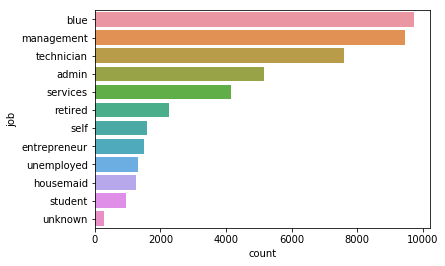

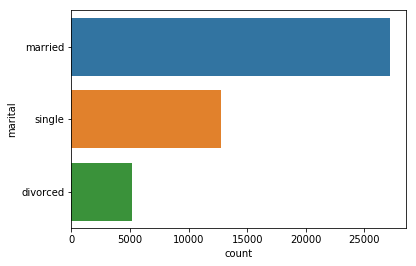

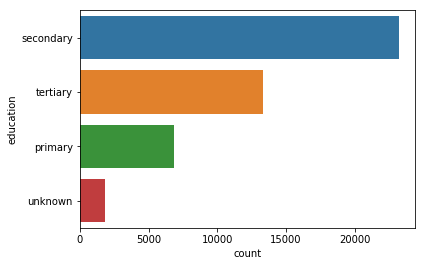

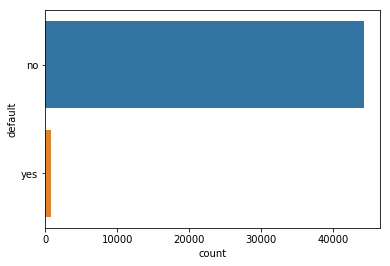

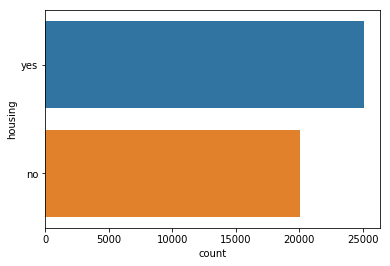

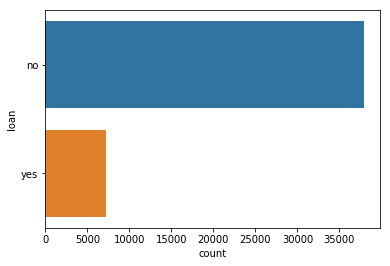

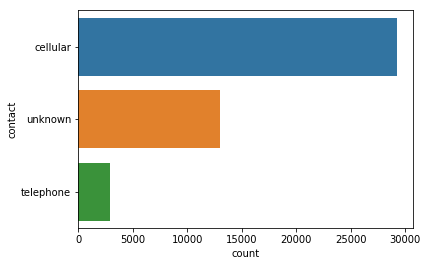

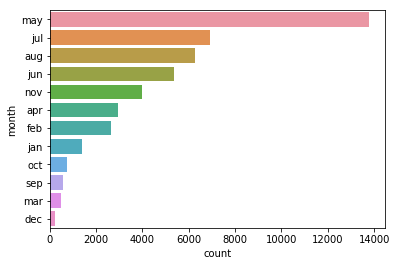

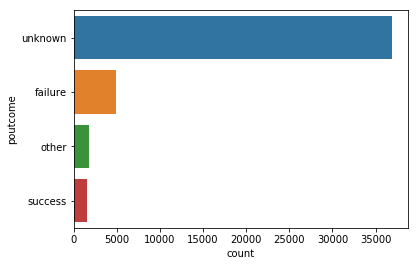

In [15]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

In [19]:
#job status as proportion of overall number of values
df.job.value_counts()/45211

blue            0.215257
management      0.209197
technician      0.168034
admin           0.114375
services        0.091880
retired         0.050076
self            0.034925
entrepreneur    0.032890
unemployed      0.028820
housemaid       0.027427
student         0.020747
unknown         0.006370
Name: job, dtype: float64

In [25]:
#default credit status as proportion of overall number of values
df.default.value_counts()/45211

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [26]:
#housing loan status as proportion of overall number of values
df.housing.value_counts()/45211

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [27]:
#personal status as proportion of overall number of values
df.loan.value_counts()/45211

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [21]:
#maritial status as proportion of overall number of values
df.marital.value_counts()/45211

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [22]:
#education status as proportion of overall number of values
df.education.value_counts()/45211

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [23]:
#month status as proportion of overall number of values
df.month.value_counts()/45211

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [24]:
#previous outcome status as proportion of overall number of values
df.poutcome.value_counts()/45211

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

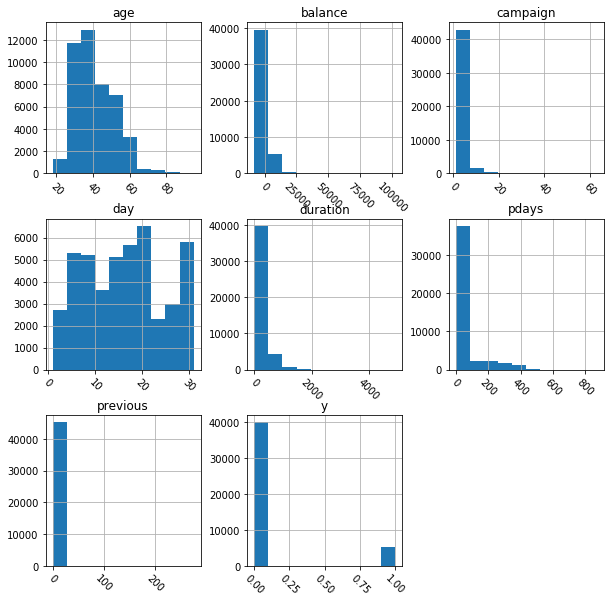

In [28]:
#Histogram grid
df.hist(figsize=(10,10), xrot=-45)
#Clear the text "residue"
plt.show()

In [29]:
#summary of numeric features
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [30]:
#Creating a copy of the original data frame
df_cleaned = df.copy()
#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']
#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']
#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
#Deleting the 'default' column
del df_cleaned['default']
#Deleting the 'duration' column
del df_cleaned['duration']

In [31]:
df_cleaned.head(15)

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,1,-1,0,unknown,0
6,28,management,single,tertiary,447,yes,yes,unknown,5,may,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,2,yes,no,unknown,5,may,1,-1,0,unknown,0
8,58,retired,married,primary,121,yes,no,unknown,5,may,1,-1,0,unknown,0
9,43,technician,single,secondary,593,yes,no,unknown,5,may,1,-1,0,unknown,0
10,41,admin,divorced,secondary,270,yes,no,unknown,5,may,1,-1,0,unknown,0
11,29,admin,single,secondary,390,yes,no,unknown,5,may,1,-1,0,unknown,0


In [32]:
df_cleaned.shape

(43193, 15)

In [36]:
a=df_cleaned.poutcome.value_counts()
b=df_cleaned.pdays.value_counts()
print(a['unknown'],b[-1])

35286 35281


In [37]:
c=df_cleaned.previous.value_counts()
print(c[0])

35281


In [41]:
no_match=df_cleaned.loc[((df_cleaned['pdays']!=-1)&(df_cleaned['poutcome']=='unknown'))]
no_match.pdays.value_counts()

416    1
188    1
528    1
98     1
168    1
Name: pdays, dtype: int64

In [42]:
#Getting the positions of the mistakenly labeled 'pdays'
x = df_cleaned.loc[(df_cleaned['pdays'] !=-1) & (df['poutcome'] == 'unknown')]['pdays'].index.values
#Assigning NaNs instead of '-1'
df_cleaned.loc[x,'pdays'] = np.nan
#Dropping NAs from the dataset
df_cleaned = df_cleaned.dropna()

In [43]:
a=df_cleaned.poutcome.value_counts()
b=df_cleaned.pdays.value_counts()
print(a['unknown'],b[-1])

35281 35281


In [12]:
#Saving the cleaned dataset as a file
df_cleaned.to_csv('cleaned_data.csv')

NameError: name 'df_cleaned' is not defined

In [13]:
df_clean=pd.read_csv('cleaned_data.csv')

In [14]:
df_clean.head()

,Unnamed: 0,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,2143,yes,no,unknown,5,may,1,-1.0,0,unknown,0
1,1,44,technician,single,secondary,29,yes,no,unknown,5,may,1,-1.0,0,unknown,0
2,2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1,-1.0,0,unknown,0
3,5,35,management,married,tertiary,231,yes,no,unknown,5,may,1,-1.0,0,unknown,0
4,6,28,management,single,tertiary,447,yes,yes,unknown,5,may,1,-1.0,0,unknown,0


In [15]:
del df_clean['Unnamed: 0']

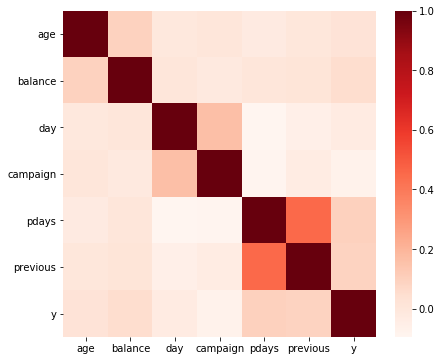

In [16]:
#Calculate correlations between numeric features
correlations = df_clean.corr()
#Make the figsize 7 x 6
plt.figure(figsize=(7,6))
_ = sns.heatmap(correlations, cmap="Reds")#heatmap

In [17]:
df_clean1 = pd.get_dummies(df_clean, drop_first=True)
df_clean1.head()

,age,balance,day,campaign,pdays,previous,y,job_blue,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,1,-1.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,35,231,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,28,447,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
from sklearn.externals import joblib

In [18]:
#Splitting variables into predictor and target variables
X=df_clean1.drop('y', axis=1)
y=df_clean1.y
#Setting up pipelines with a StandardScaler function to normalize variables
pipelines = {
    'log1':make_pipeline(StandardScaler(),LogisticRegression(penalty='l1',random_state=42,class_weight='balanced')),
    'log2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=42,class_weight='balanced')),
    #Setting the penalty for simple Logistic Regression as L2 to minimize the fitting time
    'log_reg' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=42, class_weight='balanced'))
}
#Setting up a very large hyperparameter C for the non-penalized Logistic Regression (to cancel the regularization)
log_reg_hyperparameters={
    'logisticregression__C':np.linspace(100000, 100001, 1),
    'logisticregression__fit_intercept':[True, False]
}
#Setting up hyperparameters for the Logistic Regression with log1 penalty
log1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept' : [True, False]
}
#Setting up hyperparameters for the Logistic Regression with log2 penalty
log2_hyperparameters={
    'logisticregression__C':np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept':[True, False]
}
#Creating the dictionary of hyperparameters
hyperparameters = {
    'log_reg' : log_reg_hyperparameters,
    'log1' : log1_hyperparameters,
    'log2' : log2_hyperparameters
}
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
#Creating an empty dictionary for fitted models
fitted_logreg_models={}
# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
i=0
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name],cv=10,n_jobs=-1)
    #Fitting the model on X_train, train
    model.fit(X_train, y_train)
    joblib.dump(model,"log_model_"+str(i)+".pkl")
    #Storing the model in fitted_logreg_models[name] 
    fitted_logreg_models[name] = model
    #Printing the status of the fitting
    print(name, 'fitted.')
    i=i+1

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


log1 fitted.


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


log2 fitted.


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


log_reg fitted.


In [28]:
i=0
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name],cv=10,n_jobs=-1)
    #Fitting the model on X_train, train
    model.fit(X_train, y_train)
    joblib.dump(model,"log_model_"+str(i)+".pkl")
    i=i+1

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [19]:
#Displaying best score for each fitted model
for name,model in fitted_logreg_models.items():
    print(name,model.best_score_)

log1 0.7613707783401145
log2 0.7613707783401145
log_reg 0.7613707783401145


In [20]:
#Creating an empty dictionary for predicted models
predicted_logreg_models = {}
#Predicting the response variables and displaying the prediction score
for name, model in fitted_logreg_models.items():
    y_pred = model.predict(X_test)
    predicted_logreg_models[name] = accuracy_score(y_test, y_pred)
print(predicted_logreg_models)

{'log1': 0.7636798641660878, 'log2': 0.7636798641660878, 'log_reg': 0.7636798641660878}


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [21]:
#defining the model with the highest accuracy score
max(predicted_logreg_models,key=lambda k:predicted_logreg_models[k])

'log1'

In [21]:
#Creating the confusion matrix
pd.crosstab(y_test,fitted_logreg_models['log1'].predict(X_test),rownames=['True'],colnames=['Predict'],margins=True)

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Predict,0,1,All
True,,,
0,9009,2458,11467
1,604,886,1490
All,9613,3344,12957


In [22]:
#Creating the classification report
print(classification_report(y_test, fitted_logreg_models['log1'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.79      0.85     11467
           1       0.26      0.59      0.37      1490

   micro avg       0.76      0.76      0.76     12957
   macro avg       0.60      0.69      0.61     12957
weighted avg       0.86      0.76      0.80     12957



/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


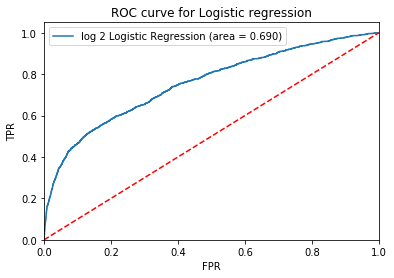

In [23]:
#Obtaining the ROC score
roc_auc = roc_auc_score(y_test, fitted_logreg_models['log1'].predict(X_test))
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, fitted_logreg_models['log1'].predict_proba(X_test)[:,1])
#Plotting the curve
plt.plot(fpr, tpr, label='log 1 Logistic Regression (area = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()

In [29]:
#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42, class_weight='balanced')),
    'gb' : make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=42))
}
#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}
#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}
#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}
#Creating an empty dictionary for fitted models
fitted_alternative_models = {}
# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
i=0
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_alternative_models[name] = alt_model
    joblib.dump(alt_model,"new_model_"+str(i)+".pkl")
    i=i+1
    
    #Printing the status of the fitting
    #print(name, 'fitted.')
#Displaying the best_score_ for each fitted model
#for name, model in fitted_alternative_models.items():
    #print(name, model.best_score_ )


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [25]:
#Creating the confusion matrix for Random Forest
pd.crosstab(y_test, fitted_alternative_models['rf'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Predicted,0,1,All
True,,,
0,11293,174,11467
1,1186,304,1490
All,12479,478,12957


In [24]:
#Creating the classification report for Random Forest
print(classification_report(y_test, fitted_alternative_models['rf'].predict(X_test)))

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11467
           1       0.64      0.20      0.31      1490

   micro avg       0.90      0.90      0.90     12957
   macro avg       0.77      0.59      0.63     12957
weighted avg       0.87      0.90      0.87     12957



In [25]:
#Creating the confusion matrix for Gradient Boosting
pd.crosstab(y_test, fitted_alternative_models['gb'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Predicted,0,1,All
True,,,
0,11314,153,11467
1,1188,302,1490
All,12502,455,12957


In [26]:
#Creating the classification report for Gradient Boosting
print(classification_report(y_test, fitted_alternative_models['gb'].predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11467
           1       0.66      0.20      0.31      1490

   micro avg       0.90      0.90      0.90     12957
   macro avg       0.78      0.59      0.63     12957
weighted avg       0.88      0.90      0.87     12957



/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [30]:
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_test, y_test)
    joblib.dump(model,"log_model_"+str(i)+".pkl")
    
    #Storing the model in fitted_logreg_models[name] 
    #fitted_alternative_models[name] = alt_model
    
    #Printing the status of the fitting
    #print(name, 'fitted.')
#Displaying the best_score_ for each fitted model
#for name, model in fitted_alternative_models.items():
    #print(name, model.best_score_ )


/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subarna/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [ ]:
joblib.dump()